## Imports

In [147]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoConfig, DataCollatorForTokenClassification 
from transformers import pipeline
import ast
from collections import Counter

/home/eli/envs/bt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load pretrained model

In [3]:
best_model_path = "../../../../models/deepset/gbert-base-sm_tg_combined-10_epochs_2022_07_10/checkpoint-932"
#best_model = f"{best_model_path}/pytorch_model.bin"
#config = f"{best_model_path}/config.json"
#tokenizer = f"{best_model_path}/vocab.txt"

In [7]:
pretrained_tokenizer = AutoTokenizer.from_pretrained(best_model_path,local_files_only=True)
pretrained_model = AutoModelForTokenClassification.from_pretrained(best_model_path,local_files_only=True)

## Initialize NER pipeline with pretrained model and 

In [148]:
ner_pipe = pipeline('ner', model=pretrained_model, tokenizer=pretrained_tokenizer, device=0)

NameError: name 'pretrained_model' is not defined

In [12]:
example_text = "Freiburg Aufzug mit Endkundgebung am Platz der alten Synagoge . Live Musik ! Details 19062021 Raus auf die Straße"

In [13]:
res = ner_pipe(example_text)

## Load Telegram messages

In [152]:
data = pd.read_csv('/home/eli/data/data_for_annotation_2022_06_27.csv')

In [150]:
data.head()

Unnamed: 0                                             id  message_id  \
0           0                      Demotermine12502886104122        4122   
1           1  Demotermine1250288610281102021-11-24 13:06:28       28110   
2           2  Demotermine1250288610318072021-12-14 22:32:02       31807   
3           3  Demotermine1250288610126762021-07-22 23:11:13       12676   
4           4  Demotermine1250288610179322021-09-15 04:52:38       17932   

                  date                                       cleaned_text  
0  2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...  
1  2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...  
2  2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...  
3  2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...  
4  2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...

## Select sample

In [21]:
sample = df.sample(1000)

In [22]:
sample

Unnamed: 0                                             id  message_id  \
2074        1534   Demotermine125028861048522021-01-04 10:58:25        4852   
338          338   Demotermine125028861060382021-02-07 01:03:20        6038   
2286        1746  Demotermine1250288610138902021-08-06 08:48:40       13890   
234          234   Demotermine125028861033862020-10-26 10:41:08        3386   
3268        2728  Demotermine1250288610257192021-11-08 10:24:28       25719   
...          ...                                            ...         ...   
1316         776  Demotermine1250288610190692021-09-24 03:22:56       19069   
872          332   Demotermine125028861019382020-07-09 18:50:37        1938   
793          253  Demotermine1250288610206822021-10-08 00:07:24       20682   
1156         616  Demotermine1250288610211982021-10-13 06:36:39       21198   
1708        1168                      Demotermine12502886109677        9677   

                     date                                       cleaned_text  
2074  2021-01-02 08:36:35  ÖSTERREICH STEHT AUF Bild zeigt Linz 01.01.202...  
338   2021-02-07 01:01:11  Öffnung ab März geplant @WirMachenAuf @BayernI...  
2286  2021-08-06 08:48:40  Italien , Menschenflut brennt grünes Zertifika...  
234   2020-10-25 18:12:21     Rot am See @BadenWuerttembergInfoChat 29102020  
3268  2021-11-08 10:25:18  " Fribourg 6.11.2o21 - Résumé & a bisserl mehr...  
...                   ...                                                ...  
1316  2021-09-24 03:23:26  🙄 " In einem neuen Wahlwerbespot der CDU ist i...  
872   2020-07-09 18:49:57  9. Rotenburger Corona-SPRECH-Stunde, 11.07.20 ...  
793   2021-10-07 23:59:16  Niemals den Framing-Medien vertrauen , gebt ih...  
1156  2021-10-13 06:36:00  Nach dem #Spaziergang ist vor dem Spaziergang ...  
1708  2021-04-29 14:05:12  Gedenkveranstaltung an den Rechtsstaat in Weim...  

[1000 rows x 5 columns]

## Apply pipeline to sample messages to get NER predictions

In [23]:
%timeit
df['detected_entities'] = df.cleaned_text.apply(lambda x: ner_pipe(x))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


/home/eli/envs/bt/lib/python3.8/site-packages/transformers/pipelines/base.py:1012: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


## Explore results

In [155]:
# print(f"TEXT: {df.loc[0, 'cleaned_text']}, DETECTED ENTITIES: {df.loc[0, 'detected_entities']}")

## Save df with NER results

In [156]:
# df.to_csv('ner_results.csv')

In [158]:
df = pd.read_csv('test_results.csv')

### Explore results for one example row

In [159]:
pd.DataFrame(ast.literal_eval(df.loc[5, 'detected_entities']))

entity     score  index       word  start  end
0   B-LOC  0.993830      1  Stuttgart      0    9
1   B-LOC  0.960257      2        Dob     10   13
2   I-LOC  0.882394      3      ##els     13   16
3   I-LOC  0.928223      4      ##tra     16   19
4   I-LOC  0.923647      5      ##sse     19   22
5  B-DATE  0.979154      6         11     23   25
6  I-DATE  0.967584      7          .     25   26
7  I-DATE  0.970531      8          8     26   27
8  I-DATE  0.934192      9          .     27   28
9  I-DATE  0.900971     10       2021     28   32

### Method to parse subtokens and B/I-tags to words and labels

In [162]:
def parse_ner_results(ner_results):
    
    # TODO: check score for B, treshold, e.g. remove all rows with treshold <= 0.7?
    # TODO: prevent ents to start with I? 

    ents_df = pd.DataFrame(ast.literal_eval(ner_results)) #
    tags = []
    words = []
    result = []
    entity_started = False

    for i in range(len(ents_df)):    
        #print(i)
        prev_word = '' if i == 0 else ents_df.loc[i-1, 'word']
        prev_tag = '' if i == 0 else ents_df.loc[i-1, 'entity']

        curr_word = ents_df.loc[i, 'word']
        curr_tag = ents_df.loc[i, 'entity']
        
        # if subtoken is tagged as beginning of an entity, change to inside of an entity
        if curr_word.startswith('##') and curr_tag.startswith('B'):
            curr_tag = curr_tag.replace('B', 'I')
        
        # B = beginning of an entity -> store tag and first word of entity in words list
        if curr_tag.startswith('B'):
            tags.append(curr_tag.replace('B-', ''))
            words.append(curr_word)
            entity_started = True

        # I = curr word is inside of an entity -> get preceding word, combine with current word and store in words list
        if curr_tag.startswith('I') and entity_started:
            # remove ## added by tokenizer to obtain clean subtoken
            if '##' in curr_word:
                curr_word = curr_word.replace('##', '')
            pred_word = words[-1]
            word_to_add = pred_word + curr_word
            words[-1] = word_to_add

        result = zip(words, tags)
    
    return list(result)

In [163]:
df['parsed_entities'] = df.detected_entities.apply(lambda x: parse_ner_results(x))

In [164]:
df.head(10)

Unnamed: 0.1  Unnamed: 0                                             id  \
0             0           0                      Demotermine12502886104122   
1             1           1  Demotermine1250288610281102021-11-24 13:06:28   
2             2           2  Demotermine1250288610318072021-12-14 22:32:02   
3             3           3  Demotermine1250288610126762021-07-22 23:11:13   
4             4           4  Demotermine1250288610179322021-09-15 04:52:38   
5             5           5  Demotermine1250288610141182021-08-11 15:42:22   
6             6           6  Demotermine1250288610177022021-09-11 12:21:24   
7             7           7  Demotermine1250288610100562021-05-06 02:35:25   
8             8           8   Demotermine125028861082052021-03-26 08:49:59   
9             9           9  Demotermine1250288610111632021-05-29 05:28:52   

   message_id                 date  \
0        4122  2020-11-24 13:22:54   
1       28110  2021-11-24 13:05:10   
2       31807  2021-12-14 22:31:13   
3       12676  2021-07-21 00:04:38   
4       17932  2021-09-15 04:51:29   
5       14118  2021-08-11 15:42:21   
6       17702  2021-09-11 12:22:27   
7       10056  2021-05-06 02:32:56   
8        8205  2021-03-26 08:49:22   
9       11163  2021-05-29 01:56:30   

                                        cleaned_text  \
0  Corona-Maßnahmen sofort beenden , Existenzen e...   
1  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3  Bristol 01082021 Overview https://t.me/Demoter...   
4  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
5  Stuttgart Dobelstrasse 11.8.2021 Schilderaktio...   
6  🇫 🇷 Paris Anspannung steigt 11.9.2021 @FranceR...   
7  Karlsruhe @BadenWuerttembergInfoChat 06052021 ...   
8  Linz Hauptplatz @OesterreichChat 26032021 Raus...   
9  Memmelsdorf @BayernInfoChat 29052021 Raus auf ...   

                                   detected_entities  \
0  [{'entity': 'B-LOC', 'score': 0.9675006, 'inde...   
1  [{'entity': 'B-LOC', 'score': 0.9774843, 'inde...   
2  [{'entity': 'B-LOC', 'score': 0.9849097, 'inde...   
3                                                 []   
4  [{'entity': 'B-LOC', 'score': 0.97016734, 'ind...   
5  [{'entity': 'B-LOC', 'score': 0.99383014, 'ind...   
6  [{'entity': 'B-LOC', 'score': 0.98340434, 'ind...   
7  [{'entity': 'B-LOC', 'score': 0.97114265, 'ind...   
8  [{'entity': 'B-LOC', 'score': 0.98813677, 'ind...   
9  [{'entity': 'B-LOC', 'score': 0.9750714, 'inde...   

                                     parsed_entities  
0                       [(@, LOC), (Stuttgart, LOC)]  
1                         [(#, LOC), (Cremona, LOC)]  
2  [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]  
3                                                 []  
4                                 [(Straßburg, LOC)]  
5  [(Stuttgart, LOC), (Dobelstrasse, LOC), (11.8....  
6   [(Paris, LOC), (11.9.2021, DATE), (France, LOC)]  
7                   [(Karlsruhe, LOC), (Baden, LOC)]  
8                        [(Linz, LOC), (Haupt, LOC)]  
9                [(Memmelsdorf, LOC), (Bayern, LOC)]

In [535]:
from ctparse import ctparse
from datetime import datetime

ents_after_normalization = []

# https://ctparse.readthedocs.io/en/latest/ctparse.html#module-ctparse.types

for i in df.index: 
    
    normalized_ents = []
    #print(normalized_ents)
    # Set timestamp of message as reference time
    ts = df.loc[i, 'date']
    
    for ent in df.loc[i, 'parsed_entities']:
        token, tag = ent
        
        if tag == 'DATE' or tag =='TIME':
            #print(token)
            try: 
                parsed_date_time = ctparse(token, ts=ts)
                #print(parsed_date_time)
                
                print(parsed_date_time.resolution)
                if tag == 'DATE': 
                    parsed_token = parsed_date_time.resolution.dt.strftime("%d.%m.%Y")
                elif tag == 'TIME':
                    parsed_token = parsed_date_time.resolution.dt.strftime("%HH:%MM")
                
                normalized_ents.append((parsed_token, tag))
                #print(normalized_ents)
            except:
                
                parsed_date_time = ctparse(token)
                #print(parsed_date_time)
        
                if tag == 'DATE': 
                    parsed_token = parsed_date_time.resolution.dt.strftime("%d.%m.%Y")
                elif tag == 'TIME':
                    parsed_token = parsed_date_time.resolution.dt.strftime("%HH:%MM")
                
                normalized_ents.append((parsed_token, tag))
                #normalized_ents.append((token, tag))
                #print(normalized_ents)
        else:
            normalized_ents.append((token, tag))
            #print(normalized_ents)
            
        ents_after_normalization.append(normalized_ents)

df['normalized_ents'] = ents_after_normalization

2021-08-11 X:X (X/X)
2021-09-11 X:X (X/X)
2021-08-29 X:X (X/X)
2021-04-17 X:X (X/X)
2021-07-02 X:X (X/X)
2021-12-13 X:X (X/X)
2021-07-31 X:X (X/X)
2021-07-28 X:X (X/X)
2021-08-29 X:X (X/X)


ValueError: cannot convert underspecified Time into datetime, missing at least one of year, month or day

In [584]:
x = ctparse('Heute')

In [585]:
from ctparse.types import Time, Interval, Duration

In [586]:
type(x.resolution) == Time

True

In [587]:
x.resolution.hasDOY

True

In [588]:
x.resolution

Time[0-5]{2022-07-18 X:X (X/X)}

In [569]:
x.production

(126, 'ruleDDMMYYYY')

In [622]:
from ctparse import ctparse
from datetime import datetime
# https://ctparse.readthedocs.io/en/latest/ctparse.html#module-ctparse.types

ents_after_normalization = []
    
for i in df.index: 
    
    normalized_ents = []
    # Set timestamp of message as reference time
    ts = df.loc[i, 'date']
    
    for ent in df.loc[i, 'parsed_entities']:
        token, tag = ent
        
        if tag == 'DATE' or tag =='TIME':
            try: 
                parsed_date_time = ctparse(token, ts=ts)
        
                if tag == 'DATE': 
                    parsed_token = parsed_date_time.resolution.dt.strftime("%d.%m.%Y")
                elif tag == 'TIME':
                    parsed_token = parsed_date_time.resolution.dt.strftime("%HH:%MM")
                
                normalized_ents.append((parsed_token, tag))
            except:
                pass
        else:
            normalized_ents.append((token, tag))
            
    ents_after_normalization.append(normalized_ents)

#pd.DataFrame(ents_after_normalization)
df['normalized_ents'] = ents_after_normalization

Failed to produce result for "18092021"
Failed to produce result for "12122021"
Failed to produce result for "#"
Failed to produce result for "#"
Failed to produce result for "#"
Failed to produce result for "05102021"
Failed to produce result for "202106"
Failed to produce result for "Wochenende"
Failed to produce result for "Beginn"
Failed to produce result for "#"
Failed to produce result for "AnfangdesJahres"
Failed to produce result for "19092021"
Failed to produce result for "01082021"
Failed to produce result for "201914"
Failed to produce result for "Bern"
Failed to produce result for "kommende"
Failed to produce result for "Wochenende"
Failed to produce result for "Wochenende"
Failed to produce result for "Woensg"
Failed to produce result for "318"
Failed to produce result for "20210116"
Failed to produce result for "vor"
Failed to produce result for "heutigen"
Failed to produce result for "20092021"
Failed to produce result for "St.Nikolaus"
Failed to produce result for "Woch

In [623]:
df.head()

Unnamed: 0.1  Unnamed: 0                                             id  \
0             0           0                      Demotermine12502886104122   
1             1           1  Demotermine1250288610281102021-11-24 13:06:28   
2             2           2  Demotermine1250288610318072021-12-14 22:32:02   
3             3           3  Demotermine1250288610126762021-07-22 23:11:13   
4             4           4  Demotermine1250288610179322021-09-15 04:52:38   

   message_id                 date  \
0        4122  2020-11-24 13:22:54   
1       28110  2021-11-24 13:05:10   
2       31807  2021-12-14 22:31:13   
3       12676  2021-07-21 00:04:38   
4       17932  2021-09-15 04:51:29   

                                        cleaned_text  \
0  Corona-Maßnahmen sofort beenden , Existenzen e...   
1  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3  Bristol 01082021 Overview https://t.me/Demoter...   
4  Straßburg @ElsassInfoChat 18092021 Raus auf di...   

                                   detected_entities  \
0  [{'entity': 'B-LOC', 'score': 0.9675006, 'inde...   
1  [{'entity': 'B-LOC', 'score': 0.9774843, 'inde...   
2  [{'entity': 'B-LOC', 'score': 0.9849097, 'inde...   
3                                                 []   
4  [{'entity': 'B-LOC', 'score': 0.97016734, 'ind...   

                                     parsed_entities  \
0                       [(@, LOC), (Stuttgart, LOC)]   
1                         [(#, LOC), (Cremona, LOC)]   
2  [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]   
3                                                 []   
4                                 [(Straßburg, LOC)]   

                                     normalized_ents  
0                       [(@, LOC), (Stuttgart, LOC)]  
1                         [(#, LOC), (Cremona, LOC)]  
2  [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]  
3                                                 []  
4                                 [(Straßburg, LOC)]

In [624]:
# parsed_ents

In [625]:
idx = 41
print(df.loc[idx, 'parsed_entities'], df.loc[idx, 'normalized_ents'])

[('2.7.21', 'DATE'), ('Bamberg', 'LOC')] [('02.07.2021', 'DATE'), ('Bamberg', 'LOC')]


In [626]:
idx = 83
print(df.loc[idx, 'parsed_entities'], df.loc[idx, 'normalized_ents'])

[('BadOldesloe', 'LOC'), ('@', 'LOC'), ('SchleswigHolstein', 'LOC')] [('BadOldesloe', 'LOC'), ('@', 'LOC'), ('SchleswigHolstein', 'LOC')]


In [627]:
normalized_ents

[('ExGeneral', 'ORG'), ('Frankreich', 'LOC'), ('EpochTimesNachrichten', 'ORG')]

In [628]:
words = []
tags = []

result = {
'LOC': [],
'DATE': [],
'TIME': [],
'PER': [],
'ACTION': [],
'ORG': [],
}


for i in df.index: 
    normalized_ents = df.loc[i, 'normalized_ents']
    
    for ele in normalized_ents:
        word, tag = ele
        words.append(word)
        tags.append(tag)
        
        # only keep words with at least 2 characters to remove noise
        if len(word) > 1:
            result[tag].append(word)
        
        
        
        
 #   print(word, tag)

In [629]:
#result

In [630]:
#result

In [631]:
# tags

In [632]:
from collections import Counter

In [633]:
#Counter(words)

In [634]:
Counter(sorted(result['LOC'])).most_common(50)

[('DE', 636),
 ('Berlin', 572),
 ('Stuttgart', 241),
 ('Bayern', 142),
 ('Deutschland', 140),
 ('München', 116),
 ('Nürnberg', 116),
 ('Wien', 115),
 ('Sachsen', 90),
 ('Dresden', 84),
 ('Leipzig', 80),
 ('Hamburg', 72),
 ('Österreich', 71),
 ('Schweiz', 70),
 ('Baden', 65),
 ('Rostock', 65),
 ('Augsburg', 64),
 ('Niedersachsen', 60),
 ('Düsseldorf', 59),
 ('Frankfurt', 56),
 ('Erfurt', 55),
 ('Köln', 55),
 ('Karlsruhe', 52),
 ('Hessen', 49),
 ('Fulda', 48),
 ('Hannover', 48),
 ('Bochum', 45),
 ('BW', 44),
 ('BY', 40),
 ('Rathausplatz', 40),
 ('Kaufbeuren', 39),
 ('Baden-Württemberg', 38),
 ('Halle', 38),
 ('SchwäbischGmünd', 37),
 ('Berliner', 36),
 ('Brandenburg', 36),
 ('Osnabrück', 36),
 ('Darmstadt', 35),
 ('Kassel', 35),
 ('Kiel', 34),
 ('Nordrhein', 34),
 ('Bern', 32),
 ('BrandenburgerTor', 31),
 ('Heilbronn', 31),
 ('NW', 31),
 ('berlin', 31),
 ('Bamberg', 29),
 ('Linz', 29),
 ('Salzburg', 29),
 ('Thüringen', 29)]

In [635]:
per_cnt = Counter(sorted(result['PER'])).most_common(50)

In [651]:
Counter(sorted(result['DATE'])).most_common(50)

[('29.08.2021', 44),
 ('28.08.2021', 33),
 ('01.08.2021', 26),
 ('20.11.2021', 22),
 ('04.12.2021', 20),
 ('06.11.2021', 16),
 ('25.09.2021', 16),
 ('27.11.2021', 14),
 ('18.09.2021', 13),
 ('11.12.2021', 11),
 ('13.11.2021', 11),
 ('01.12.2021', 10),
 ('15.05.2021', 9),
 ('23.10.2021', 9),
 ('28.11.2021', 9),
 ('02.10.2021', 8),
 ('06.12.2021', 8),
 ('14.08.2021', 8),
 ('18.12.2021', 8),
 ('25.10.2021', 8),
 ('04.09.2021', 7),
 ('09.10.2021', 7),
 ('11.09.2021', 7),
 ('13.03.2021', 7),
 ('01.05.2021', 6),
 ('13.12.2021', 6),
 ('18.11.2020', 6),
 ('19.12.2021', 6),
 ('30.10.2021', 6),
 ('01.11.2021', 5),
 ('03.04.2021', 5),
 ('03.07.2021', 5),
 ('10.04.2021', 5),
 ('11.11.2021', 5),
 ('12.12.2021', 5),
 ('16.10.2021', 5),
 ('19.06.2021', 5),
 ('20.03.2021', 5),
 ('20.09.2020', 5),
 ('31.01.2021', 5),
 ('31.07.2021', 5),
 ('03.01.2021', 4),
 ('03.10.2021', 4),
 ('03.12.2021', 4),
 ('07.12.2021', 4),
 ('10.10.2021', 4),
 ('11.10.2021', 4),
 ('12.06.2021', 4),
 ('16.05.2021', 4),
 ('17.01

In [637]:
Counter(sorted(result['TIME'])).most_common(50)

[]

In [638]:
Counter(sorted(result['ORG'])).most_common(50)

[('Teleg', 130),
 ('Facebook', 55),
 ('Twitter', 44),
 ('YouTube', 31),
 ('CDU', 28),
 ('SPD', 28),
 ('EpochTimesNachrichten', 27),
 ('Cor', 26),
 ('AfD', 21),
 ('Instagram', 18),
 ('FreieJugend', 14),
 ('Baden', 11),
 ('EpochTimes', 11),
 ('ARD', 10),
 ('Pay', 10),
 ('Grünen', 9),
 ('Anti', 8),
 ('Bundesver', 8),
 ('Freiejugend', 8),
 ('Google', 8),
 ('bild', 8),
 ('dem-info', 8),
 ('@sachsen', 7),
 ('Bundeswehr', 7),
 ('OffeneGesellschaftKurpfalz', 7),
 ('Stuttgarter_Zeitung', 7),
 ('tw', 7),
 ('FDP', 6),
 ('FreiePresse', 6),
 ('GD-TV', 6),
 ('MS', 6),
 ('Telegsachsen', 6),
 ('fac', 6),
 ('google', 6),
 ('BürgerforumSchwabene.V.', 5),
 ('DW', 5),
 ('FDJ', 5),
 ('FPS', 5),
 ('France', 5),
 ('RBB', 5),
 ('SED', 5),
 ('Telegram', 5),
 ('What', 5),
 ('ZDF', 5),
 ('dem-info.at', 5),
 ('he', 5),
 ('tel', 5),
 ('AUF', 4),
 ('Antifa', 4),
 ('BBC', 4)]

In [639]:
Counter(sorted(result['ACTION'])).most_common(50)

[]

In [640]:
from wordcloud import WordCloud

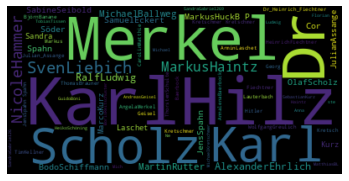

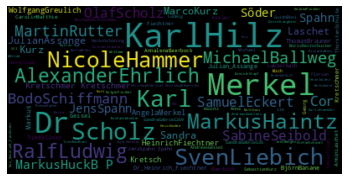

In [641]:
# Generate a word cloud image
wordcloud = WordCloud().generate(" ".join(result['PER']))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(" ".join(result['PER']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [642]:
import numpy as np

In [643]:
from os import path


# load and show an image with Pillow
from PIL import Image


# read the mask image
# taken from
# #https://www.vecteezy.com/vector-art/6631360-coronavirus-stencil-molecule-covid-19
corona_mask = np.array(Image.open('/home/eli/data/vecteezy_coronavirus_stencil.jpg'))

In [644]:
corona_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [645]:


# generate word cloud

# store to file
#wc.to_file(path.join(d, "alice.png"))



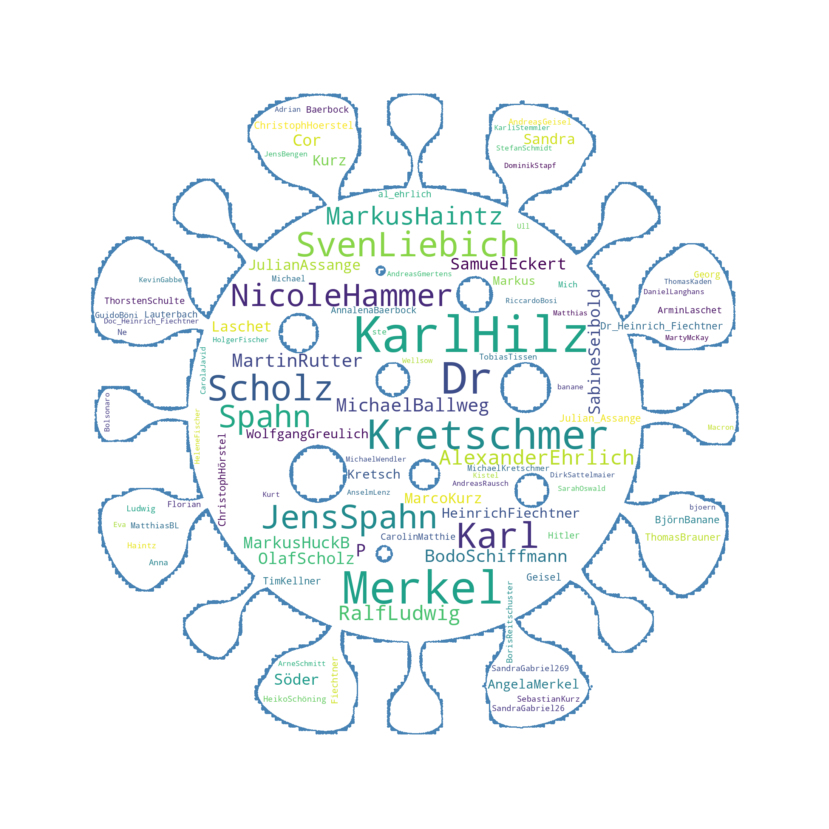

In [646]:
wc = WordCloud(collocations=False, width=400, height=400,background_color="white", max_words=100, mask=corona_mask, contour_width=3, contour_color='steelblue').generate(" ".join(result['PER']))

# show
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

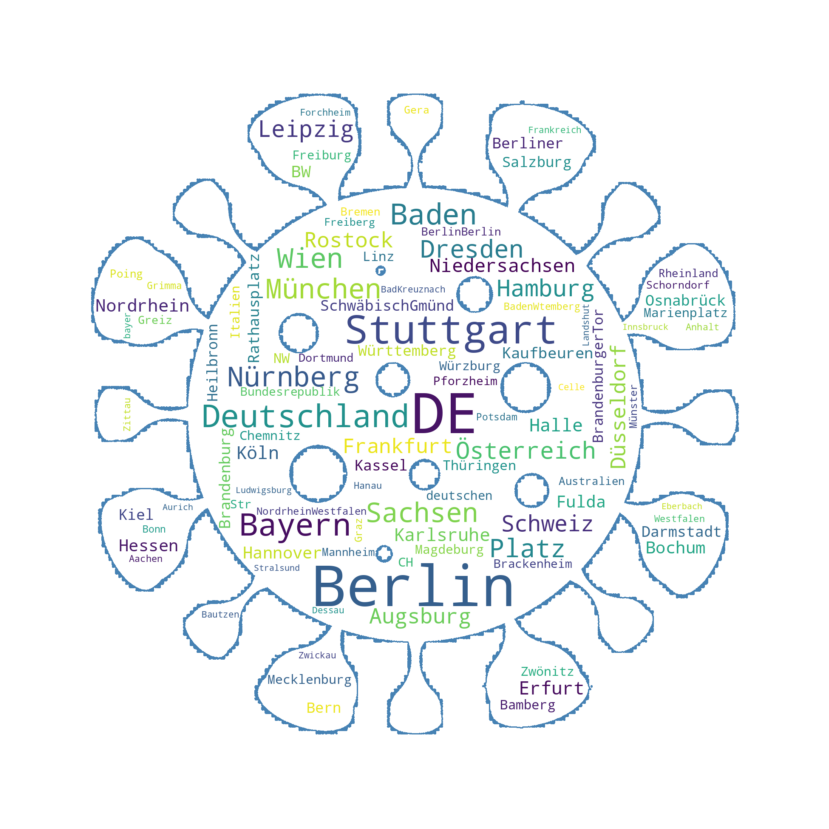

In [647]:
wc = WordCloud(collocations=False, width=400, height=400,background_color="white", max_words=100, mask=corona_mask, contour_width=3, contour_color='steelblue').generate(" ".join(result['LOC']))

# show
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

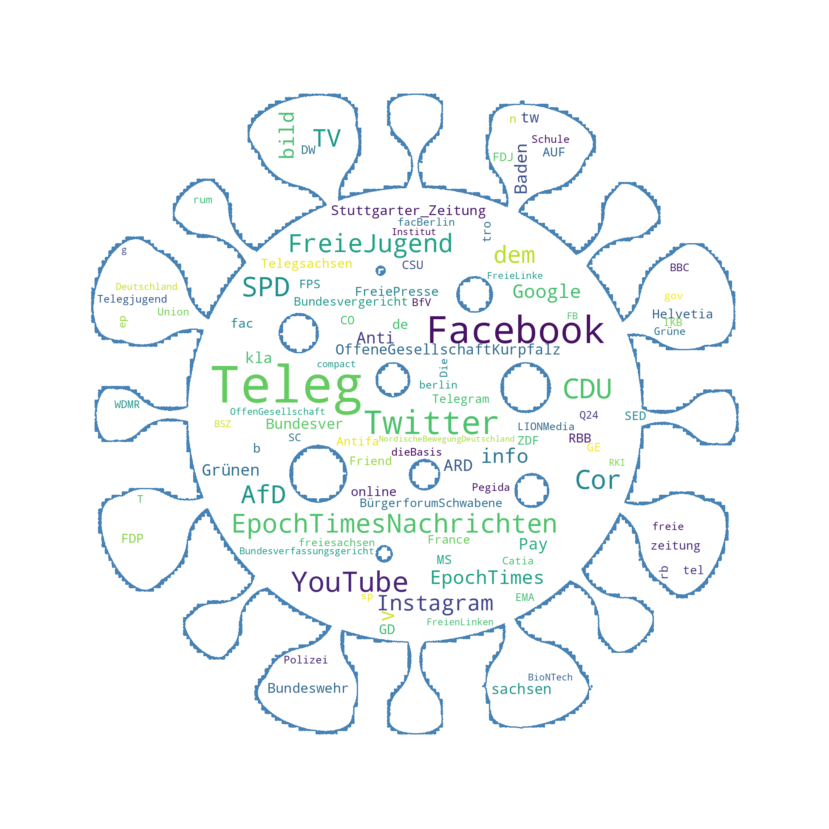

In [648]:
wc = WordCloud(
    collocations=False, 
    width=400, 
    height=400,
    background_color="white", 
    max_words=100, 
    mask=corona_mask, 
    contour_width=3, 
    contour_color='steelblue'
).generate(" ".join(result['ORG']))

# show
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [649]:
wc = WordCloud(
    collocations=False, 
    width=400, 
    height=400,
    background_color="white", 
    max_words=100, 
    mask=corona_mask, 
    contour_width=3, 
    contour_color='steelblue'
).generate(" ".join(result['TIME']))

# show
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [655]:
#result['DATE']

In [668]:
dates = " ".join(result['DATE'])

In [669]:
len(dates)

9041

In [672]:
dates[:30]

'11.08.2021 11.09.2021 29.08.20'

In [680]:
date_counts = Counter(result['DATE'])

In [681]:
#counts

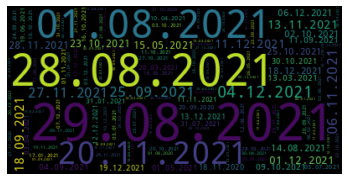

In [682]:
wordcloud = WordCloud().generate_from_frequencies(date_counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

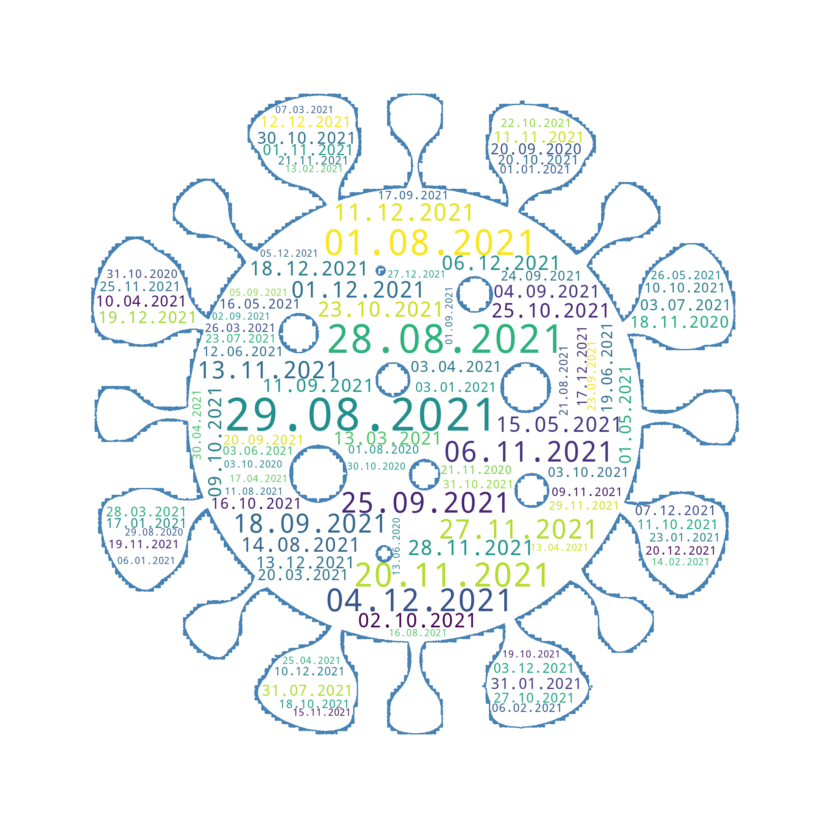

In [685]:
wc_dates = WordCloud(
    collocations=False, 
    width=400, 
    height=400,
    background_color="white", 
    max_words=100, 
    mask=corona_mask, 
    contour_width=3, 
    contour_color='steelblue'
).generate_from_frequencies(date_counts)

# show
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(wc_dates, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# ACTION: no ents found

In [ ]:
list(result)

In [ ]:
sample_dates = result['DATE'][10:40]

In [ ]:
parsed_dates = []

for d in sample_dates:
    parsed_dates.append([d, ctparse(d, ts=ts)])

In [ ]:
parsed_dates

In [ ]:
tags = []
words = []
result = []

for i in range(len(ents_df)):    
    print(i)
    prev_word = '' if i == 0 else ents_df.loc[i-1, 'word']
    prev_tag = '' if i == 0 else ents_df.loc[i-1, 'entity']
    
    curr_word = ents_df.loc[i, 'word']
    curr_tag = ents_df.loc[i, 'entity']
    
    # B = beginning of an entity -> store tag and first word of entity in words list
    if curr_tag.startswith('B'):
        tags.append(curr_tag.replace('B-', ''))
        words.append(curr_word)
    
    # current word is inside of an entity -> get preceding word (last word in words list), combine with current word and store in words list
    if curr_tag.startswith('I'):
        try: 
            next_word = ents_df.loc[i+1, 'word']
            next_tag = ents_df.loc[i+1, 'entity']
        
            # next word is inside of an entity -> get preceding word, combine with current word and store in words list
            if next_tag.startswith('I'):
                pred_word = words[-1]
                word_to_add = pred_word + curr_word
                words[-1] = word_to_add
            
            # next word is beginning of a new entity -> get preceding word, combine with current word and store in words list
            elif next_tag.startswith('B'):
                pred_word = words[-1]
                word_to_add = pred_word + curr_word
                words[-1] = word_to_add
       
        # to prevent list index out of range exception
        except:
            pred_word = words[-1]
            word_to_add = pred_word + curr_word
            words[-1] = word_to_add
            
result = zip(words, tags)

#print(tags)
#print(words)
print(list(result))

In [85]:
result